## Abalone Project

In [31]:
#import required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Model selection Lib
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df =pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 


#### Name / Data Type / Measurement Unit / Description
-----------------------------
    Sex / nominal / -- / M, F, and I (infant)
    Length / continuous / mm / Longest shell measurement
    Diameter / continuous / mm / perpendicular to length
    Height / continuous / mm / with meat in shell
    Whole weight / continuous / grams / whole abalone
    Shucked weight / continuous / grams / weight of meat
    Viscera weight / continuous / grams / gut weight (after bleeding)
    Shell weight / continuous / grams / after being dried
    
   #### Output variable
    Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 


##### Initial Observation to select model

    -  Dataset is having independent value (input) and depedent variable (target/label).So this is
       Supervised learning
    -  Input and output value is representing this is classification alrithem

Intial EDA process will carriying out to apply the ML model in the data

In [3]:
df.shape

(4177, 9)

In [4]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
# Using label encode changing object to numerical value
from sklearn.preprocessing import LabelEncoder 

In [7]:
le = LabelEncoder()

In [8]:
df['Sex']=le.fit_transform(df['Sex'].astype(str))

In [9]:
df['Sex'].unique()

array([2, 0, 1])

<AxesSubplot:>

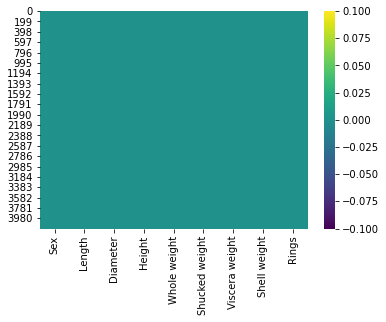

In [10]:
# Visual representation
sns.heatmap(df.isnull(),cmap='viridis')

In [11]:
# Summary Statistics
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Observation : 
    1.
    

<AxesSubplot:>

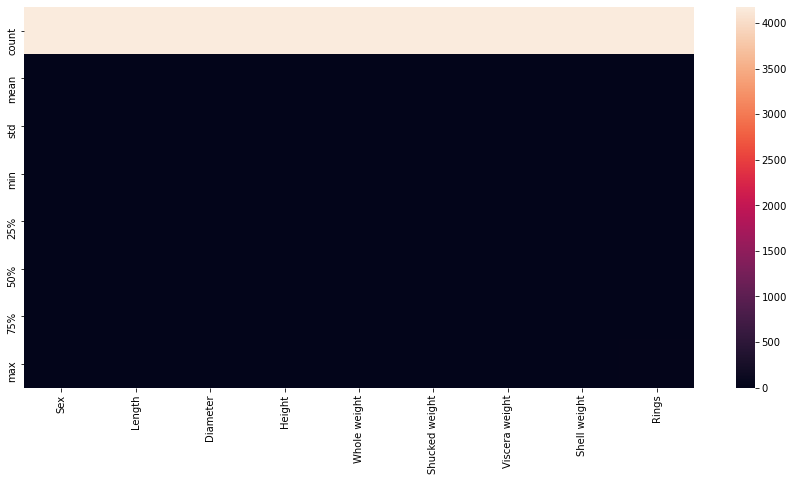

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.describe())

In [13]:
#Checking the skewness
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Sex                  AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Length            AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Diameter          AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Height            AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Whole weight      AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Shucked weight    AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Viscera weight    AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Shell weight      AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Rings                   AxesSubplot(0.125,0.125;0.0824468x0.343182)
dtype: object

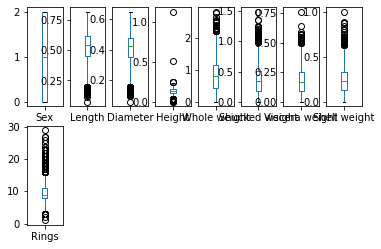

In [14]:
#Checking outlier by ploting the diagram
df.plot(kind='box',subplots=True,layout=(2,8))

In [15]:
# Checking correlation inbetween data
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

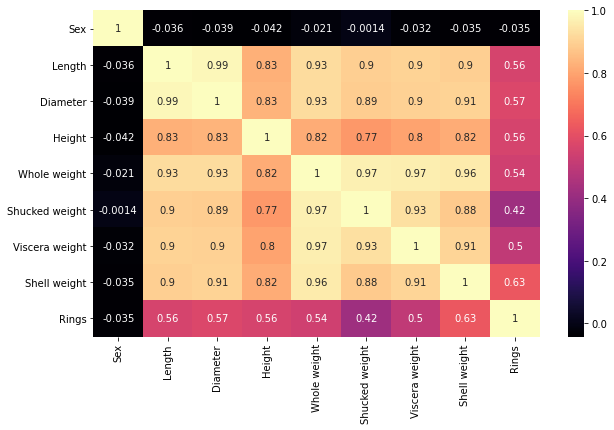

In [16]:
# Plotting the corelation of data
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='magma',annot=True)

#### Observation : Correlation of dataset

    1.Sex and rings is highly negative correlated So droping that feature.
    2.Multicolineary is not there 

In [17]:
# Highly Negative correlated
df.drop('Sex',axis=1,inplace=True)

In [18]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [22]:
#Removing outlier
#using scipy library find z score value

from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [23]:
new_df =df[(z<3).all(axis=1)]

In [24]:
new_df.shape

(4027, 8)

In [25]:
df.shape

(4177, 8)

In [26]:
# Data Loss
data_loss = (4177-4027)/4177*100
data_loss

3.5910940866650707

In [27]:
#Creating Dataset
x =new_df.iloc[:,0:-1]
x.shape

(4027, 7)

In [29]:
y = new_df['Rings']
y.shape

(4027,)

In [32]:
# Spliting training and testing data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.22,random_state=40)

In [33]:
# The shape of dataset
print("X Train",x_train.shape)
print("Y Train",y_train.shape)
print("X Test",x_test.shape)
print("Y Test",y_test.shape)

X Train (3141, 7)
Y Train (3141,)
X Test (886, 7)
Y Test (886,)


In [34]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
dst = DecisionTreeClassifier()
#mnb = MultinomialNB()
svc = SVC()
knn = KNeighborsClassifier()

model = [dst,svc,knn]

def performance(actual,predicted):
    print("Accuracy Value",accuracy_score(actual,predicted))
    print("_"*50)
    print("Confusion Matix",confusion_matrix(actual,predicted))
    print("_"*50)
    print("Classification Report",classification_report(actual,predicted))

In [36]:
# for loop to execute all models

for m in model:
    training_model = m.fit(x_train,y_train)
    prec_y = training_model.predict(x_test)
    print(type(m))
    performance(y_test,prec_y)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy Value 0.1963882618510158
__________________________________________________
Confusion Matix [[ 1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  5  1  3  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  6  7  4  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 21 15  6  6  1  1  0  1  0  0  0  0  0  0]
 [ 0  0  4 17 23 17  8  2  2  1  0  1  1  0  0  0  0]
 [ 0  0  1  7 26 21 22 21 17  4  2  0  2  1  0  0  0]
 [ 0  0  2  4 16 24 36 29 30 11  7  3  5  0  0  2  1]
 [ 0  0  1  0  3 18 17 26 35 17  9  3  4  0  0  0  2]
 [ 0  0  1  1  3  9 16 26 21  8  7  7  2  0  1  2  1]
 [ 0  0  0  0  2  4  5 12  7  7  6  3  2  0  1  0  1]
 [ 0  0  0  1  0  3  1  7 11  5  3  0  3  0  2  2  1]
 [ 0  0  0  0  0  2  1  3  4  2  2  0  3  4  0  2  2]
 [ 0  0  0  0  0  1  5  5  2  1  2  0  3  1  2  0  4]
 [ 0  0  0  0  0  0  2  2  2  2  2  3  1  0  0  1  0]
 [ 0  0  0  0  0  1  0  1  2  2  2  2  2  1  0  1  0]
 [ 0  0  0  0  0  0  2  2  0  2  0

C:\Users\SIVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
